Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 11.4 MB/s 
     |████████████████████████████████| 596 kB 46.8 MB/s 
     |████████████████████████████████| 895 kB 38.1 MB/s 
     |████████████████████████████████| 3.3 MB 48.1 MB/s 
     |████████████████████████████████| 61 kB 448 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Importing All required Libraries and Loading Dataset into a Dataframe.

In [ ]:
import pandas as pd
import string
import numpy as np
import random
import matplotlib.pyplot as plt
punctuations= string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
#import tokenizer
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support,log_loss
from sklearn.linear_model import Lasso, SGDClassifier,LogisticRegression as LR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from sklearn.svm import SVC
import seaborn as sns
import pylab as pl
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
def clean_text(text,stop_words=True):
    cleaned_text = text.lower()
    cleaned_text = "".join(c for c in cleaned_text if c not in punctuations)
    words = cleaned_text.split()
    if stop_words==True:
      words = [w for w in words if w not in stopword_list]
    words = [lem.lemmatize(word, "v") for word in words]
    words = [lem.lemmatize(word, "n") for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text
    
path='/content/drive/My Drive/'
with open(path+'dontpatronizeme_v1.4/dontpatronizeme_pcl.tsv') as f:
  rows = f.read().split('\n')[4:]
  df =pd.DataFrame([i.split('\t') for i in rows],columns=['par_id', 'art_id', 'keyword', 'country', 'text', 'label'])
  l=[]
  for i in df['label']:
    if i ==0 or i==1:
      l.append('No PCL')
    else:
      l.append('PCL')
  df['original_label']=l
for i in df.columns:
  df[i]=df[i].apply(clean_text)
#df['label'] = [int(i) for i in df['label']]
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,par_id,art_id,keyword,country,text,label,original_label
0,1,24942188,hopeless,ph,live time absolute insanity pretty sure people...,0,pcl
1,2,21968160,migrant,gh,libya today countless number ghanaian nigerian...,0,pcl
2,3,16584954,immigrant,ie,white house press secretary sean spicer say fo...,0,pcl
3,4,7811231,disable,nz,council customer sign would display two space ...,0,pcl
4,5,1494111,refugee,ca,like receive migrant flee el salvador guatemal...,0,pcl


**ML MODELS**

In [ ]:
tfidf_transformer1 = TfidfVectorizer()
x=df['text']
y=df['label']
x1= tfidf_transformer1.fit_transform(x)
x1 = x1.toarray()
pcas = PCA(500).fit(x1)
x1 = pcas.transform(x1)
dt=pd.DataFrame(x1)
dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-0.012012,-0.043367,0.039508,-0.047414,0.022077,-0.031832,-0.014004,0.068254,-0.002538,0.058075,-0.003566,-0.014553,-0.013387,0.025226,-0.008143,-0.033696,0.023270,0.028396,0.022438,0.038161,0.018377,-0.005084,-0.010551,-0.017469,0.005503,0.000466,0.010052,-0.033586,-0.013652,0.020902,0.033782,-0.027533,0.011989,-0.028920,-0.030482,0.010439,0.011211,0.023833,0.004557,-0.024289,...,-0.029404,-0.022921,0.014913,-0.035322,-0.030175,-0.005661,-0.011427,-0.007382,-0.022622,-0.013059,-0.013909,0.022306,-0.005039,0.011876,0.019545,0.008543,0.010908,0.030069,0.002995,-0.037179,-0.013327,0.039142,0.000768,-0.006526,-0.031632,0.046409,-0.016983,0.005627,0.023789,-0.023068,-0.007934,0.000273,0.018430,0.013627,0.009391,0.019864,0.004096,0.032527,0.024831,-0.025416
1,-0.069546,0.030708,-0.073707,-0.030648,0.007586,0.021000,0.042132,-0.006712,-0.001857,0.043321,-0.008457,0.019736,0.014180,-0.022192,0.007465,0.076654,-0.015412,-0.026911,0.000386,0.018212,-0.029738,-0.037651,-0.000594,0.003799,0.037853,0.009575,-0.021678,-0.010171,0.004117,-0.013084,0.027042,-0.059243,-0.042718,0.000726,0.019708,0.023014,0.001687,0.017208,0.006291,-0.050856,...,0.003593,-0.010575,0.006235,-0.031366,0.035348,-0.046135,0.007838,-0.004402,0.012917,-0.019118,0.016102,-0.012693,-0.007588,0.020422,0.001855,-0.015251,-0.016626,-0.047948,0.029048,-0.015984,-0.000964,-0.001927,0.010850,-0.011488,-0.005822,0.024316,0.036836,-0.009113,-0.018481,-0.003887,-0.030367,-0.000003,0.030725,-0.020159,0.017683,0.003844,0.003619,0.002024,0.002787,-0.037025
2,-0.067972,0.046724,-0.119317,-0.108371,-0.013408,-0.004236,0.055028,-0.021564,-0.046522,-0.147109,0.028385,-0.008314,0.043521,-0.093208,0.063468,0.008977,-0.037994,0.067008,-0.037547,-0.065254,0.032434,-0.056595,-0.011162,-0.017040,0.115892,0.122457,-0.020923,-0.034387,0.056888,0.044391,-0.038295,-0.015412,-0.002001,0.029840,-0.024825,-0.022847,-0.002642,0.006353,-0.047042,-0.002550,...,-0.038479,0.005254,0.026058,0.020910,-0.039764,-0.025815,0.045875,0.011519,0.007412,0.002898,0.019004,-0.019890,-0.008834,0.022706,0.015691,0.024854,-0.029748,-0.008640,0.007007,-0.046176,0.007203,0.030823,-0.044738,0.009305,0.013758,-0.001588,-0.000605,0.013870,-0.005065,0.011817,-0.017777,0.000507,-0.005989,0.035424,-0.013751,0.003743,0.006045,-0.010895,-0.001175,-0.024603
3,-0.000930,-0.044648,0.008711,-0.026099,-0.018928,0.032586,-0.084687,0.030549,-0.075745,-0.025458,-0.028778,0.045685,0.080362,-0.005945,0.081811,-0.013460,-0.078120,0.043450,-0.148385,-0.133246,0.235941,0.019551,-0.036382,-0.030087,0.125784,-0.026027,0.131054,0.016813,0.076067,-0.017332,-0.021808,-0.023772,-0.000838,0.048174,-0.000281,-0.016075,0.043970,-0.010175,-0.068018,-0.043920,...,-0.013209,0.032637,-0.023945,-0.004162,0.033980,0.060616,0.003914,0.000028,-0.001267,-0.010649,0.000785,-0.010385,0.030322,-0.005674,-0.004864,0.023667,-0.035549,0.015029,0.021599,-0.018164,0.033212,-0.003252,0.016526,-0.002808,0.026311,-0.035708,-0.018678,-0.002373,-0.028662,-0.035123,-0.003385,0.045884,0.011665,-0.014052,-0.061726,0.014183,-0.022871,0.014200,0.012162,-0.002471
4,-0.071431,0.060319,0.054391,0.044092,0.010027,-0.040983,-0.001835,0.037287,0.003647,-0.019347,0.033744,0.044975,0.006248,0.010431,-0.044625,0.013033,-0.002135,0.018243,0.023759,-0.017309,0.005148,0.020520,0.015277,-0.016387,-0.015938,0.025628,0.013172,0.000948,-0.002931,-0.051095,0.007147,0.016390,0.018934,0.003266,-0.017015,0.011900,0.024302,0.023572,0.023524,0.018036,...,-0.017934,-0.007157,0.003441,-0.023176,0.025346,-0.037962,0.002921,0.008509,-0.015310,0.010629,0.003434,-0.009625,-0.030952,0.030623,0.010538,0.005693,-0.024166,-0.021443,-0.015510,-0.010230,0.037761,0.006454,0.011309,-0.005952,-0.015409,0.006979,-0.003098,-0.019273,-0.018

Creating a Confusion Matrix and Calculating Accuracy, Precision , Recall and F scoreof the model.

In [ ]:
def confusion_matrixs(y, yp):
  #k = sorted(y.unique())
  k = sorted(list(set(y)))
  df = pd.DataFrame(index=k, columns=k)
  df.fillna(0, inplace=True)
  for i, j in zip(y, yp):
    df.loc[i, j] += 1
  sns.heatmap(df, annot=True)
  plt.plot()
train_x,test_x,train_y,test_y = train_test_split(x1,y, random_state = 56,test_size=0.2,stratify=y)
X_train,y_train,X_test,y_test=train_x,train_y,test_x,test_y
sgdl = SGDClassifier(eta0=0.0001, alpha=0.0001, loss='hinge',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='optimal')
sgdl.fit(X_train, y_train)
print(f'train accuracy: {sgdl.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgdl.predict(X_test))
conf_mat = confusion_matrix(y_test,sgdl.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgdl.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgdl.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
#confusion_matrixs(y_test, sgdl.predict(X_test))

train accuracy: 0.8167164179104478
The accuracy of the model is : 81.5 %
Confusion Matrix:
 [[1356    2    2    12    3]
 [ 189     1    6    5     9]
 [  29     5    2    1     0]
 [  92     3   14    4    10]
 [  77     1    1    7     1]]
Precision =  0.7013 
Recall =  0.8152 
F-Score =  0.7327


**Multi Layer Perceptron**

In [ ]:
ANN_clf = MLPClassifier(hidden_layer_sizes=(500,250,50,10),activation='relu', solver='adam')
X_train=train_x
X_test=test_x
ANN_clf.fit(X_train,train_y)
print('Training Accuracy :',ANN_clf.score(X_train,train_y))
print('Testing Accuracy :',ANN_clf.score(X_test,test_y))
print(classification_report(test_y,ANN_clf.predict(X_test) ))
print(confusion_matrix(test_y, ANN_clf.predict(X_test)))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, ANN_clf.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confusion_matrixs(y_test, ANN_clf.predict(X_test))

Training Accuracy : 0.9997611940298508
Testing Accuracy : 0.7693409742120344
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1706
           1       0.18      0.15      0.17       189
           2       0.08      0.03      0.05        29
           3       0.05      0.01      0.02        92
           4       0.12      0.09      0.10        78

    accuracy                           0.77      2094
   macro avg       0.26      0.24      0.24      2094
weighted avg       0.72      0.77      0.74      2094

[[1573   90    4    9   30]
 [ 145   29    2    6    7]
 [  20    3    1    1    4]
 [  57   21    1    1   12]
 [  45   17    4    5    7]]
Precision =  0.7203 
Recall =  0.7693 
F-Score =  0.743


**Bi-directional LSTM**

In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
training_portion = .8

articles  = df['text']
labels = df['label']

train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(articles)
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(32, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6,activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
es = EarlyStopping(patience=2)
mc=ModelCheckpoint('time_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
callbacks = [mc,es]
history = model.fit(train_padded, training_label_seq, callbacks=callbacks,epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

8375
8375
8375
2094
2094
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 429,542
Trainable

In [ ]:
import pickle
model = tf.keras.models.load_model('time_model.h5')

The Following Graph shows that training and validation Accuracy increases with each epoch, where as loss decreases with each epoch. though there is some dip at 7th epoch, by the end of 10 epochs the accuracy gradually increased and loss gradually decreased.

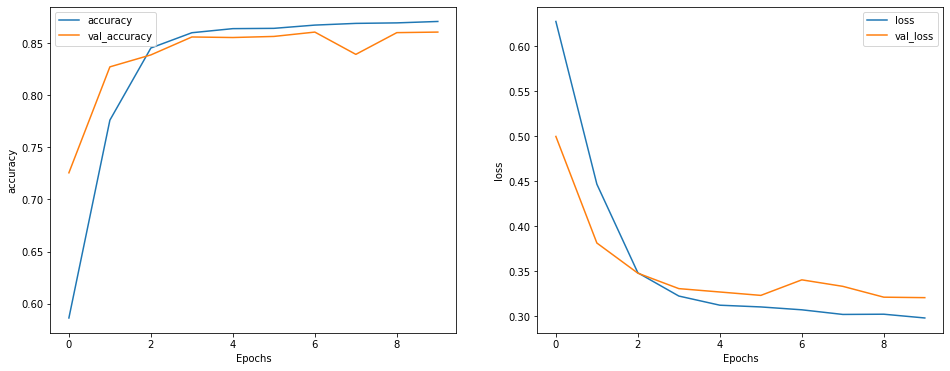

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
scores = model.evaluate(validation_padded, validation_label_seq, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 81.95%


In [ ]:
txt = df['text'][random.randrange(0,len(df))]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['0', '1', '3', '4', '2']
k=[]
for i in range(pred.shape[1]):
  l=[]
  for j in range(pred.shape[0]):
      l.append(pred[j][i])
  k.append(sum(l))
print(labels[np.argmax(k)])

1


**TensorFlow Roberta Model**

In [ ]:
# Detect hardware, return appropriate distribution strategy (you can see that it is pretty easy to set up).
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    #print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

#print('Number of replicas:', strategy.num_replicas_in_sync)
MODEL_NAME = 'roberta-base'
MAX_LEN = 256
#ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 8 * strategy.num_replicas_in_sync
EPOCHS = 3

'''if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)'''
X_data = df[['text']].to_numpy().reshape(-1)
y_data = df[['label']].to_numpy().reshape(-1)
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)
        
        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])
        
        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN
        
        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')
        
        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=777)
# Import tokenizer from HuggingFace
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')
with strategy.scope():
    roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
def build_model(n_categories,roberta_model):
    with strategy.scope():
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        # Import RoBERTa model from HuggingFace
        
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        # Huggingface transformers have multiple outputs, embeddings are the first one,
        # so let's slice out the first position
        x = x[0]

        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(256, activation='tanh')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(128, activation='tanh')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(40, activation='tanh')(x)
        x = tf.keras.layers.Dense(n_categories, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(lr=1e-5),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model
with strategy.scope():
    model = build_model(len(df['label'].unique()),roberta_model)
    model.summary()

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.58.38.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.58.38.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 256)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_roberta_model_1 (TFRobertaM  TFBaseModelOutputWi  124645632  ['input_word_ids[0][0]',         
 odel)                          thPoolingAndCrossAt               'input_mask[0][0]',       

In [ ]:
with strategy.scope():
    print('Training...')
    history = model.fit(X_train,
                        y_train,
                        epochs=4,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        validation_data=(X_test, y_test))

Training...
Epoch 1/4
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None,) dtype=int32>]
Instructions for updating:
use `experimental_local_results` instead.
Instructions for updating:
use `experimental_local_results` instead.
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 256) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None,) dtype=int32>]
115/115 [==============================] - 167s 741ms/step - loss: 0.6252 - accuracy: 0.8140 - val_loss: 0.5856 - val_accuracy: 0.8074
Epoch 2/4
115/115 [========

Accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 91.29%
